In [1]:
# %matplotlib inline

import matplotlib.pyplot as plt

In [8]:
from datetime import timedelta, datetime

import numpy as np
import yfinance as yf

import sys
sys.path.append("..") 

from optfolio.optimize import Optimizer

In [ ]:
# skipped block

PERIOD = '10y'
TICKERS = [
    # Internet services
    'msft',
    'goog',
    'fb',
#     'twtr',
    'vmw',
#     'orcl',
#     'bidu',
    'spot',
    # Application software
    'shop',
    'adbe',
    'crm',
#     'wday',
#     'sap',
    'sq',
    'team',
    # Comm. equipment
#     'csco',
    # Semiconductors
    'intc',
    'amd',
    'txn',
# #     'qcom',
    'nvda',
    # Misc
#     'dell',
    # Personal finance
    'v',
    'ma',
    'pypl',
    # Consumer directionary
    'aapl',
    'nke',
#     'ads',
#     'sne',
    'amzn',
#     'ebay',
#     'baba',
    # Aerospace
    'lmt',
    'noc',
#     'ba',
    # Media
    'nflx',
    'dis',
    # Airlines
    'dal',
    'ual',
#     'luv',
    # Automotive
    'tsla'
]

data = yf.download(
    tickers=TICKERS,
    period=PERIOD,
    interval='1d',
    auto_adjust=True,
    prepost=False,
    groupby='ticker'
).dropna(axis=1, how='all')

print(data)

daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]
daily_returns.head()

In [16]:
import pandas as pd

data = pd.read_csv('stock_data.csv', header=[0, 1], index_col=0, parse_dates=True)

daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]
daily_returns.head()

,AAPL,ADBE,AMD,AMZN,CRM,DAL,DIS,GOOG,INTC,LMT,...,PYPL,SHOP,SPOT,SQ,TEAM,TSLA,TXN,UAL,V,VMW
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-23,-0.017171,-0.004350,-0.061538,-0.007974,0.011893,0.003927,0.000776,-0.007577,-0.000878,0.019628,...,NaN,NaN,NaN,NaN,NaN,0.002532,0.040352,-0.012571,-0.013806,0.019742
2013-07-24,0.051362,-0.005617,-0.008197,-0.007042,-0.012459,0.017115,0.002948,-0.000996,0.007912,0.010177,...,NaN,NaN,NaN,NaN,NaN,-0.008473,0.000000,0.011863,-0.009704,0.167228
2013-07-25,-0.004563,-0.000209,0.019284,0.014919,0.028803,0.032692,-0.001392,-0.016835,0.005670,0.003190,...,NaN,NaN,NaN,NaN,NaN,0.019474,0.008220,-0.019159,0.042088,0.010096
2013-07-26,0.005679,-0.003139,0.032432,0.028378,0.000000,0.019553,0.006662,-0.002647,0.008673,0.004184,...,NaN,NaN,NaN,NaN,NaN,0.042879,-0.003567,0.056851,-0.007245,-0.019990
2013-07-29,0.015420,-0.009866,-0.018325,-0.018942,0.002082,-0.026484,-0.005694,-0.003479,-0.000860,-0.000083,...,NaN,NaN,NaN,NaN,NaN,0.040420,-0.006181,-0.038621,-0.006366,0.008499


## Stocks

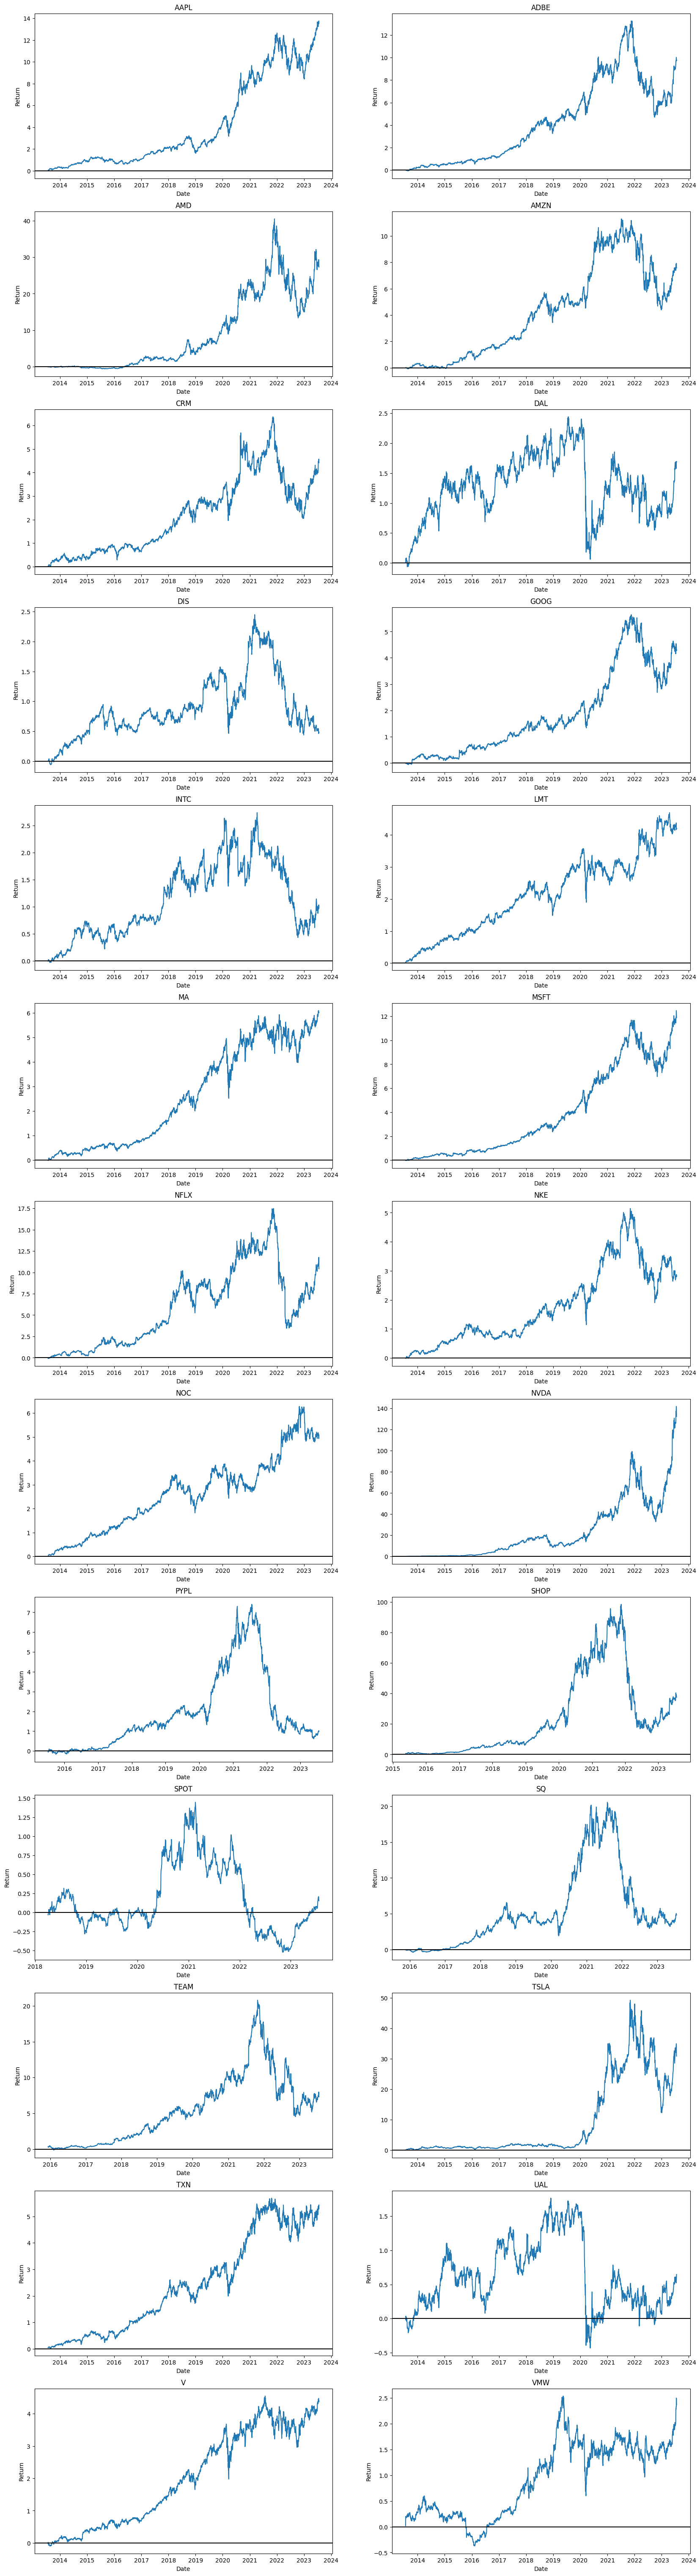

In [17]:
n_rows = int(np.ceil(daily_returns.shape[1] / 2.0))
plt.figure(figsize=(20, n_rows * 6))
for i, ticker in enumerate(daily_returns.columns):
    plt.subplot(n_rows, 2, i + 1)
    plt.title(ticker)
    plt.plot(np.cumprod(daily_returns[ticker] + 1) - 1)
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.axhline(0, color='black')
plt.show()

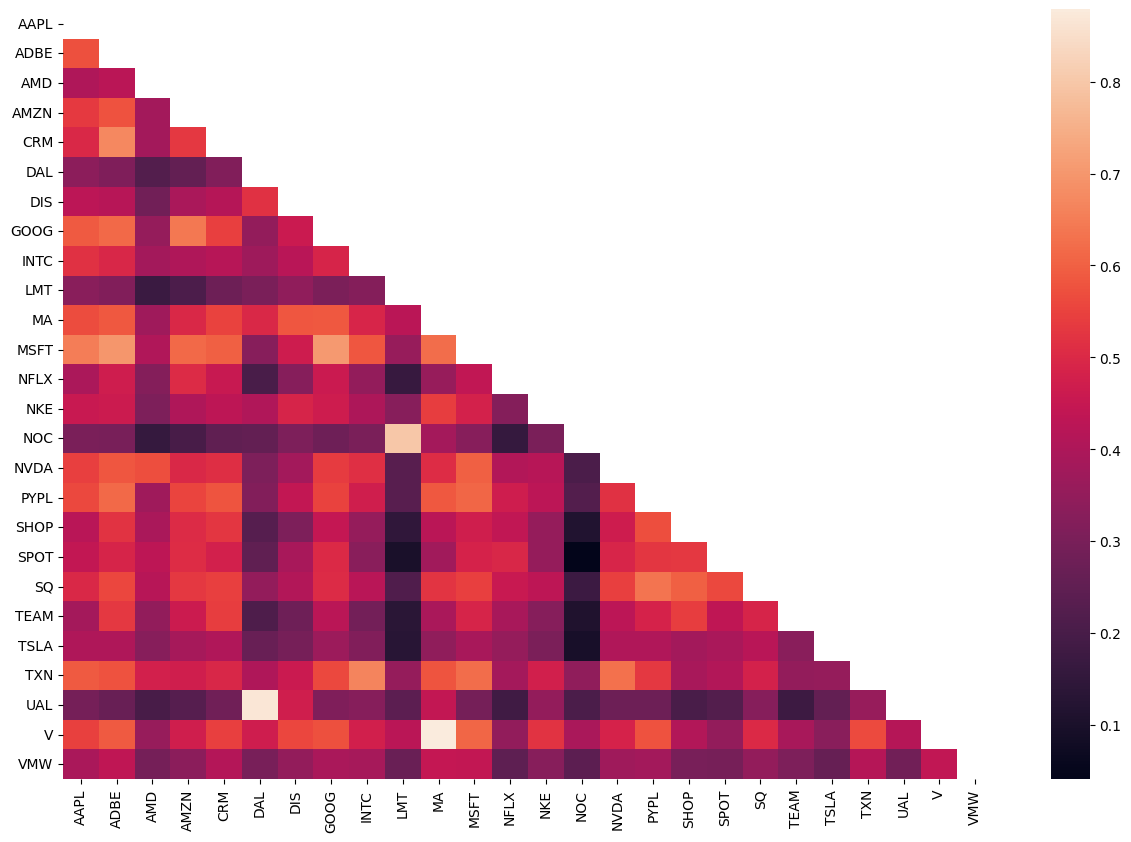

In [18]:
import seaborn as sns

plt.figure(figsize=(15,10))
cm = daily_returns.corr()
mask = (1 - np.tril(np.ones_like(cm))) == 1
cm[np.eye(cm.shape[0]) == 1] = np.nan
cm[mask] = np.nan
# cm[cm <= 0.5] = np.nan
sns.heatmap(cm)
plt.show()

In [19]:
# do not download
# spy_data = yf.download(tickers='SPY', period=PERIOD, interval='1d', auto_adjust=True, prepost=False)

spy_data = pd.read_csv("spy_data.csv")
spy_daily_returns = (spy_data['Close'] / spy_data['Close'].shift(1) - 1)[1:]
spy_daily_returns.head()

1   -0.002123
2   -0.003666
3    0.002433
4    0.001066
5   -0.003075
Name: Close, dtype: float64

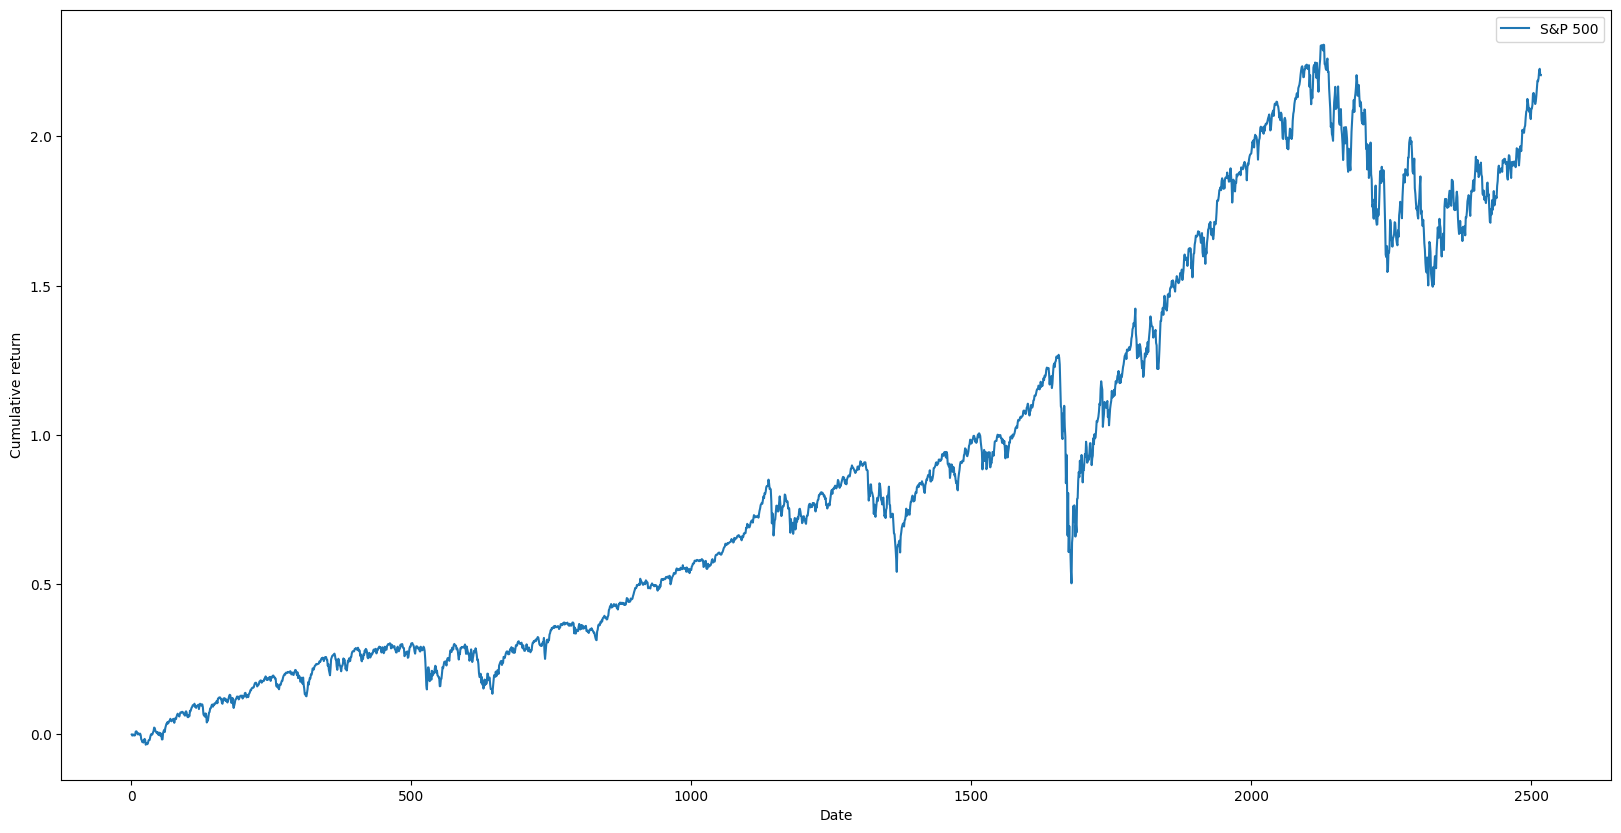

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumprod(spy_daily_returns + 1) - 1, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.show()

## Optimization

In [22]:
YEAR_BARS = 252
TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)

# dead code
# train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
# test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

# spy_train = spy_daily_returns[(spy_daily_returns.index < TRAIN_END_DATE)].fillna(0)
# spy_test = spy_daily_returns[(spy_daily_returns.index >= TRAIN_END_DATE)].fillna(0)


# Ensure the index is of type DatetimeIndex
daily_returns.index = pd.to_datetime(daily_returns.index)
spy_daily_returns.index = pd.to_datetime(spy_daily_returns.index)

# Then, you can run the rest of your code
train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

spy_train = spy_daily_returns[(spy_daily_returns.index < TRAIN_END_DATE)].fillna(0)
spy_test = spy_daily_returns[(spy_daily_returns.index >= TRAIN_END_DATE)].fillna(0)

print(np.any(np.isnan(train)))
print(train.shape)
train.tail()


False
(2516, 26)


,AAPL,ADBE,AMD,AMZN,CRM,DAL,DIS,GOOG,INTC,LMT,...,PYPL,SHOP,SPOT,SQ,TEAM,TSLA,TXN,UAL,V,VMW
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-14,0.000787,-0.004736,0.000173,0.002829,-0.004514,-0.023524,-0.020449,0.006969,-0.021258,-0.004438,...,-0.004006,-0.027284,0.005435,-0.009711,0.005675,0.012523,-0.012396,-0.034221,-0.000616,-0.005981
2023-07-17,0.017306,0.013927,0.020528,-0.008316,-0.005800,0.006668,-0.034530,-0.005091,0.036802,0.012190,...,0.019279,0.003360,0.041504,0.034455,0.008158,0.031985,0.014100,-0.000187,0.003413,0.019138
2023-07-18,-0.001340,0.019598,-0.003296,-0.005466,-0.001623,0.033547,0.004558,-0.007836,0.003782,-0.030364,...,0.011974,-0.020676,0.002288,0.012426,0.038907,0.010194,0.001527,0.027377,-0.013197,-0.004648
2023-07-19,0.007072,-0.009507,-0.012719,0.019047,0.029609,0.003721,0.012682,-0.010477,-0.001159,-0.009195,...,-0.002017,0.014422,0.001448,-0.010629,0.006028,-0.007091,-0.000054,0.000182,0.002700,0.051805
2023-07-20,-0.010097,-0.019519,-0.053079,-0.039894,-0.026497,0.002884,-0.009536,-0.026470,-0.031631,0.009967,...,-0.016168,-0.040891,-0.040925,-0.025835,-0.068618,-0.097370,-0.020417,0.032299,-0.007456,-0.017518


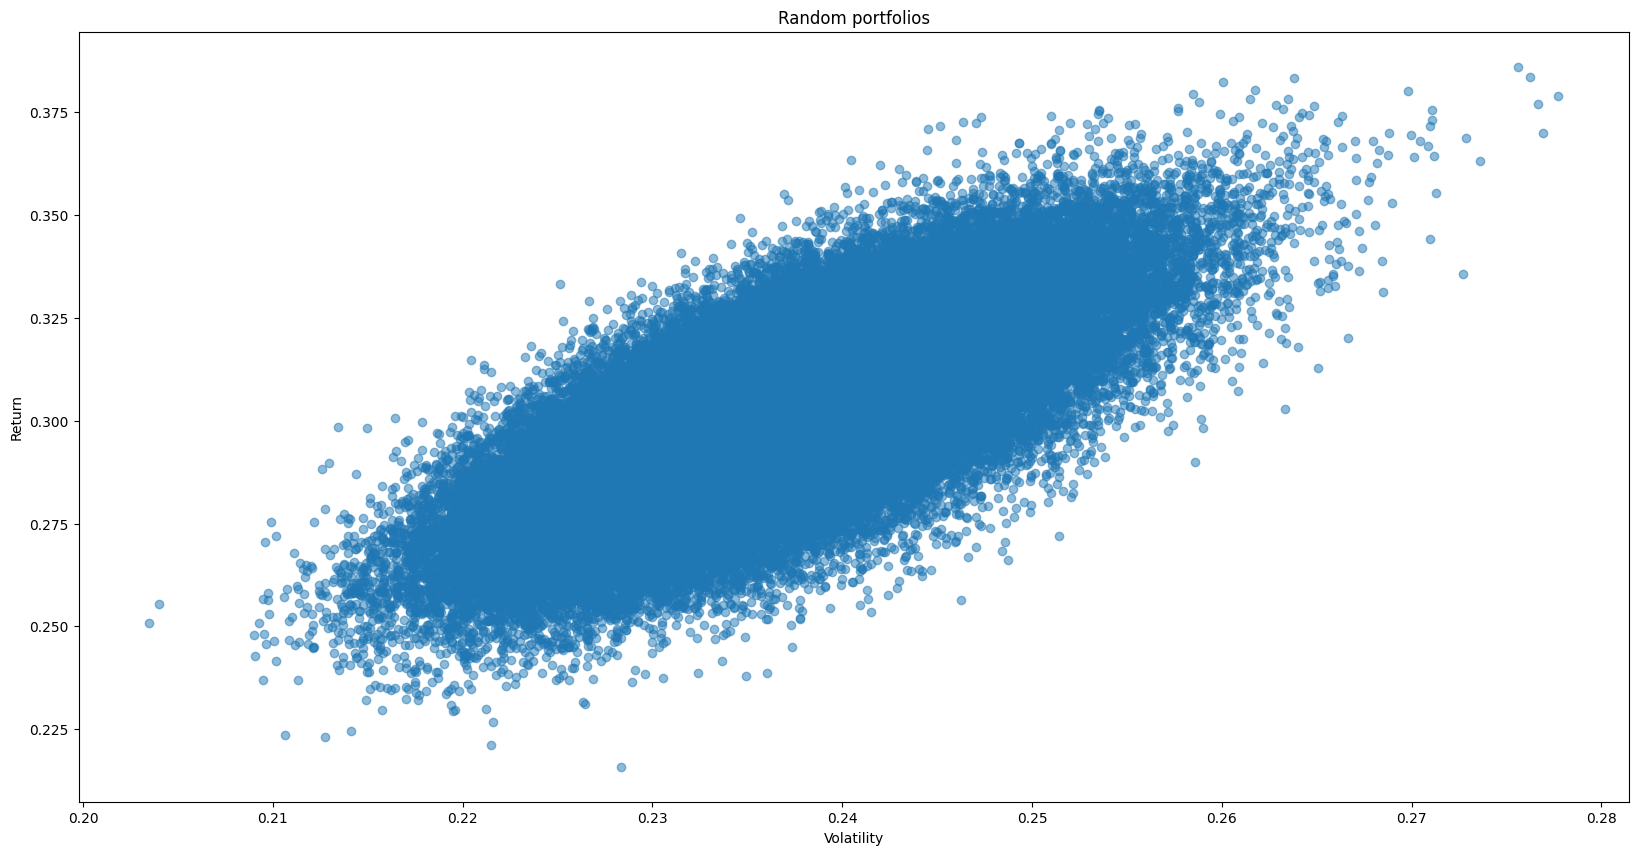

In [23]:
def random_population(n_assets, population_size):
    weights = np.random.uniform(0, 1, size=(population_size, n_assets))

    return weights / weights.sum(axis=-1).reshape((-1, 1))

def annualized_portfolio_return(returns, weights):
    weighted_returns = np.matmul(weights, np.mean(returns.values, 0))

    return (weighted_returns + 1) ** YEAR_BARS - 1


def annualized_portfolio_volatility(returns, weights):
    variance = np.sum(weights * np.matmul(weights, np.cov(returns.T.values)), -1)

    return np.sqrt(variance) * np.sqrt(YEAR_BARS)
    

def annualized_portfolio_performance(returns, weights):
    return np.stack([
        annualized_portfolio_return(returns, weights),
        annualized_portfolio_volatility(returns, weights)
    ], -1)

rand_weights = random_population(train.shape[1], 100000)
rand_solutions = annualized_portfolio_performance(train, rand_weights)

plt.figure(figsize=(20,10))
plt.title('Random portfolios')
plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [24]:
optimizer = Optimizer(mutation_sigma=1.0, verbose=False, max_iter=250, population_size=5000)
solutions, stats = optimizer.run(train.values)

In [25]:
solutions.shape

(291, 26)

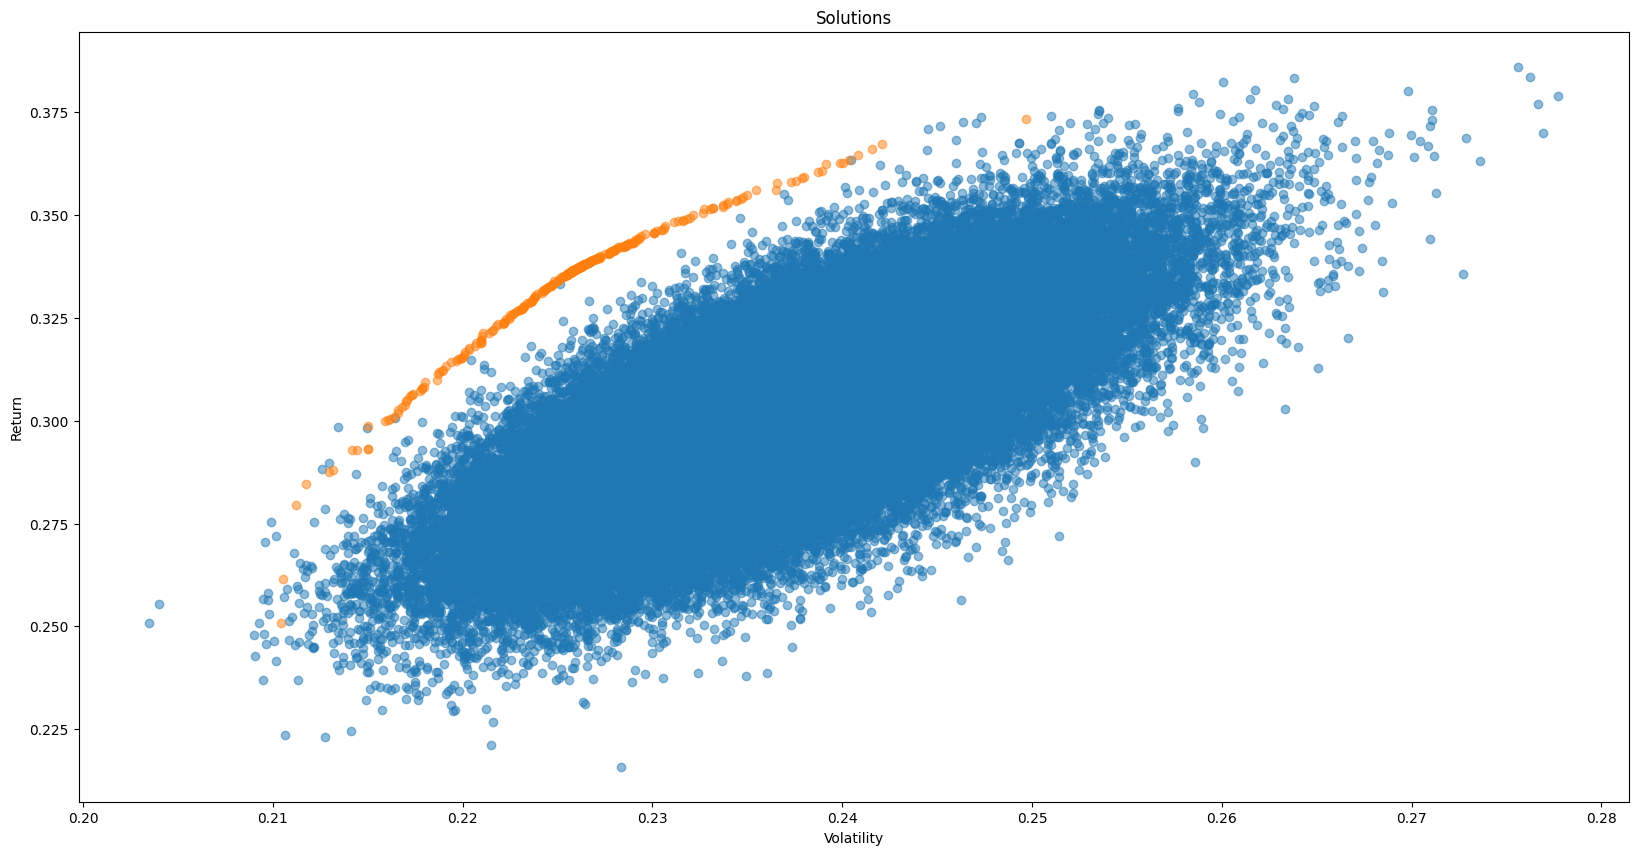

In [26]:
def plot_solutions(data, solutions, rand_solutions):
    ov = annualized_portfolio_performance(data, solutions)
    plt.figure(figsize=(20,10))
    plt.title('Solutions')
    plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
    plt.scatter(ov[:,1], ov[:,0], alpha=.5)
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.show()
    
plot_solutions(train, solutions, rand_solutions)

In [27]:
ov = annualized_portfolio_performance(train, solutions)
sharpe = ov[:,0] / ov[:,1]
# solution = solutions[np.argmin(np.abs(ov[:,1] - 0.16))]
solution = solutions[np.argmax(ov[:,0] / ov[:,1])]
annualized_portfolio_performance(train, solution)

array([0.36725144, 0.24210569])

In [28]:
CAPITAL = 38000

def print_allocation(data, allocations, prices):
    for ticker_id in np.argsort(-allocations):
        print('%s - %.4f, $%.2f USD, %.2f shares' % (data.columns[ticker_id], allocations[ticker_id] * 100, CAPITAL * allocations[ticker_id], (CAPITAL * allocations[ticker_id]) / prices[data.columns[ticker_id]]))
        
print_allocation(train, solution, data['Close'].iloc[-1])

NFLX - 7.0641, $2684.37 USD, 6.28 shares
SHOP - 6.8220, $2592.34 USD, 39.54 shares
AAPL - 6.7761, $2574.93 USD, 13.42 shares
NVDA - 6.5948, $2506.02 USD, 5.66 shares
NOC - 6.4993, $2469.74 USD, 5.45 shares
MSFT - 6.3480, $2412.23 USD, 7.02 shares
LMT - 5.9781, $2271.67 USD, 5.00 shares
AMD - 5.7891, $2199.86 USD, 19.83 shares
TXN - 5.7498, $2184.92 USD, 11.85 shares
ADBE - 5.6166, $2134.32 USD, 4.10 shares
TSLA - 5.4266, $2062.09 USD, 7.93 shares
VMW - 3.5228, $1338.66 USD, 8.35 shares
MA - 3.0782, $1169.73 USD, 2.94 shares
AMZN - 2.9303, $1113.50 USD, 8.57 shares
V - 2.8198, $1071.53 USD, 4.48 shares
DAL - 2.5834, $981.69 USD, 20.22 shares
TEAM - 2.3866, $906.92 USD, 5.20 shares
INTC - 2.1456, $815.31 USD, 23.97 shares
SQ - 1.9557, $743.17 USD, 9.76 shares
GOOG - 1.9460, $739.49 USD, 6.15 shares
UAL - 1.7070, $648.65 USD, 11.26 shares
CRM - 1.3998, $531.92 USD, 2.33 shares
DIS - 1.3536, $514.36 USD, 5.90 shares
PYPL - 1.3294, $505.17 USD, 6.92 shares
NKE - 1.0894, $413.96 USD, 3.80 sh

In [29]:
','.join(train.columns)

'AAPL,ADBE,AMD,AMZN,CRM,DAL,DIS,GOOG,INTC,LMT,MA,MSFT,NFLX,NKE,NOC,NVDA,PYPL,SHOP,SPOT,SQ,TEAM,TSLA,TXN,UAL,V,VMW'

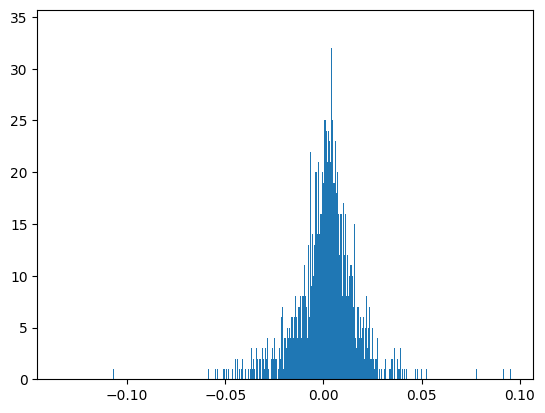

In [30]:
ret = np.dot(train, solution)
plt.hist(ret, bins=1000)
plt.show()

In [31]:
from optfolio.returns_projection import cumulative_n_period_returns, sample_returns, mcmc_sample_returns
from optfolio.report import plot_traces, returns_table

### S&P 500 MC Projection

In [32]:
print("Annualized return: %.6f" % (np.mean(spy_train + 1) ** 252 - 1))
print("Annualized volatility: %.6f" % (np.sqrt(np.var(spy_train) * 252)))

Annualized return: 0.141016
Annualized volatility: 0.174629


In [33]:
spy_traces = sample_returns(spy_train, 10 * 252, n_traces=100000)

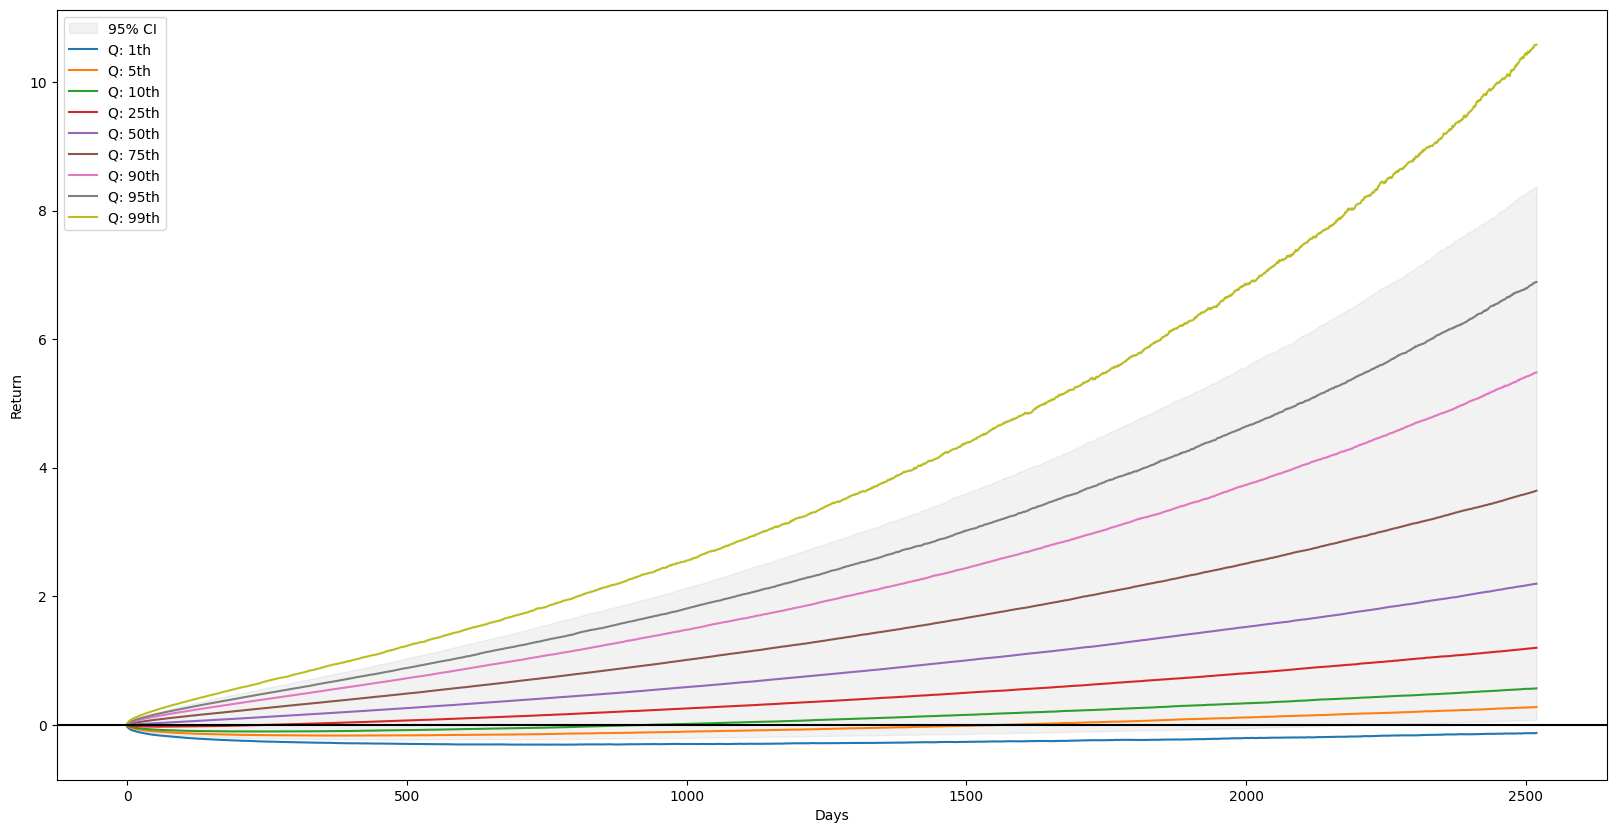

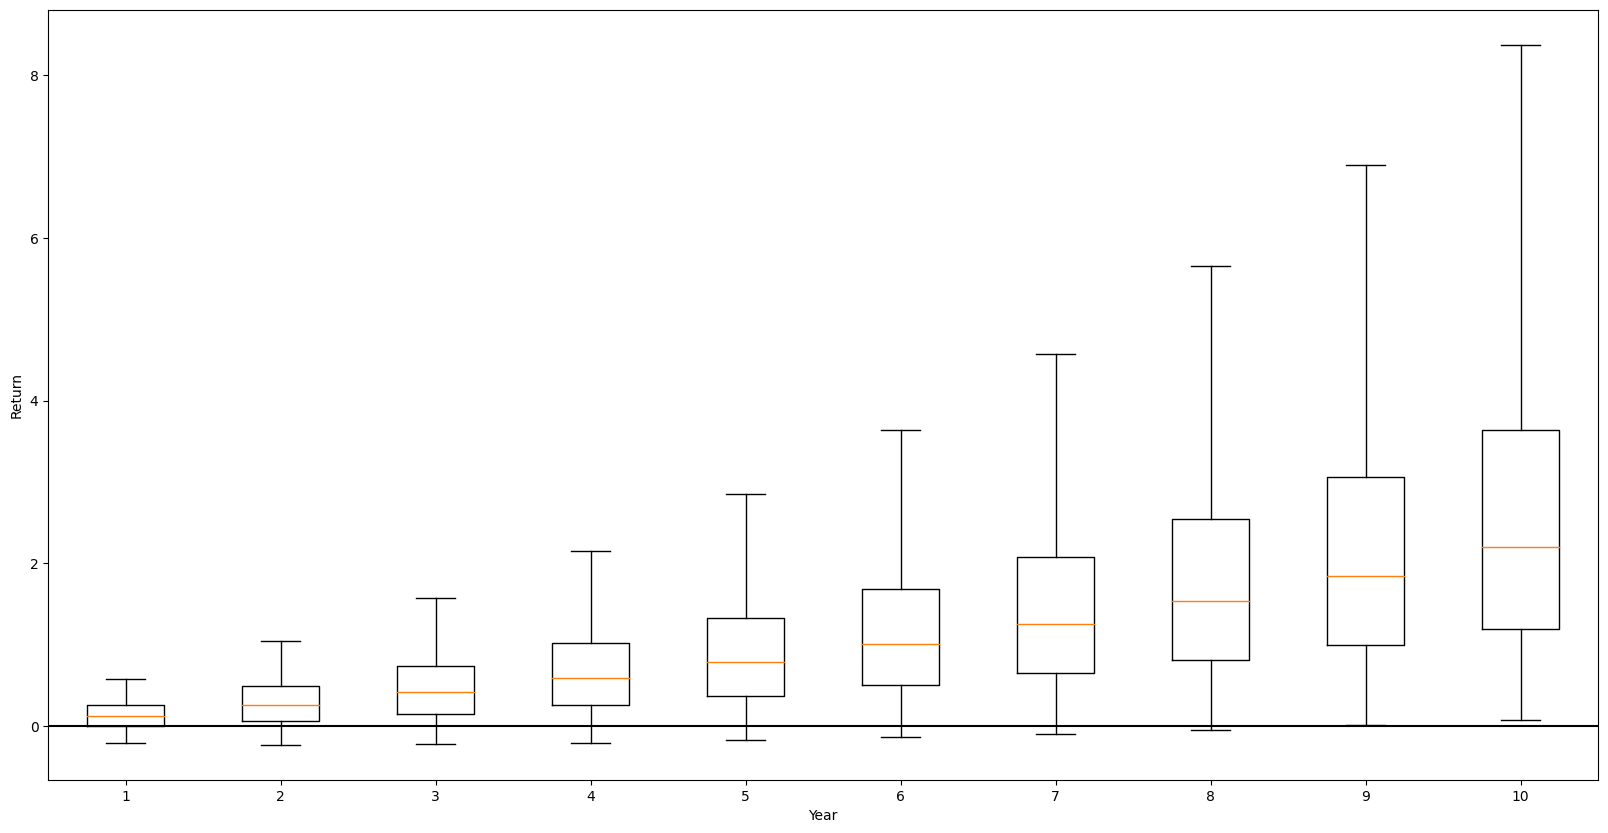

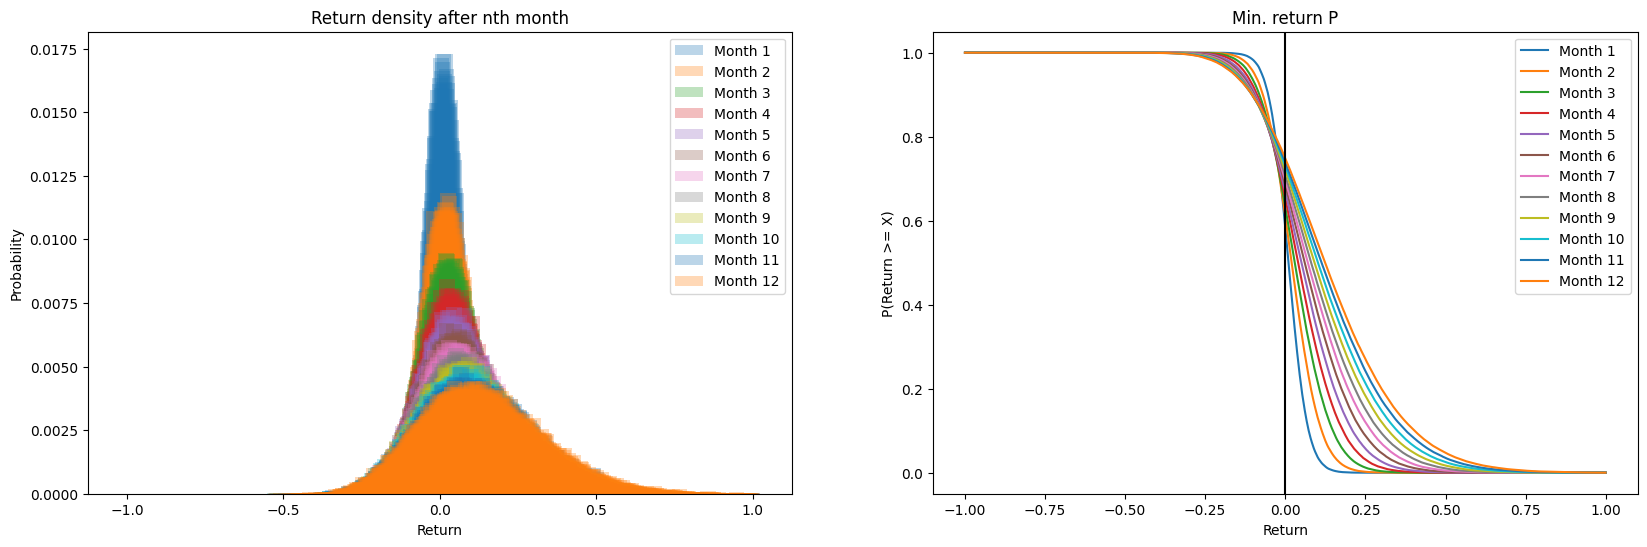

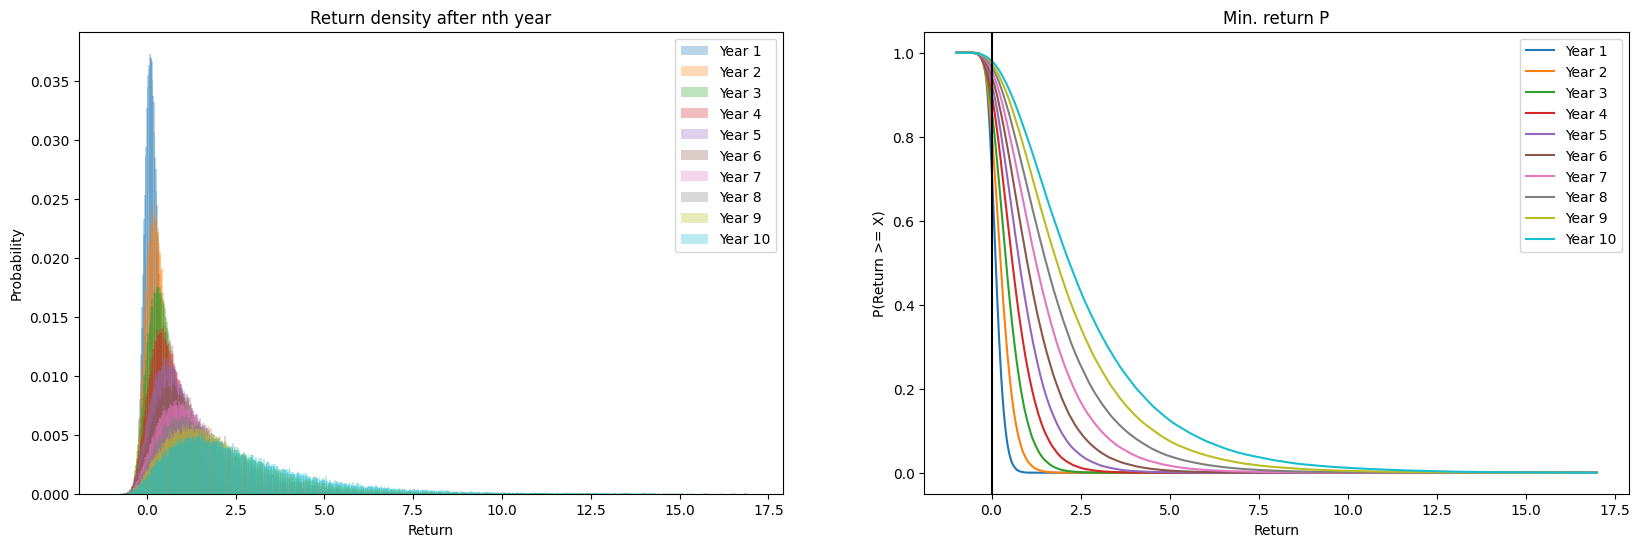

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,24.960,75.040,0.038,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,17.346,82.654,3.019,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,12.631,87.369,12.725,0.645,0.033,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,9.204,90.796,25.832,3.427,0.426,0.035,0.006,0.002,0.001,0.000,0.000,0.000
5,6.868,93.132,38.914,9.179,1.977,0.385,0.090,0.019,0.002,0.001,0.000,0.000
6,5.288,94.712,50.585,17.403,5.286,1.669,0.527,0.168,0.055,0.012,0.004,0.003
7,4.023,95.977,60.344,26.858,10.780,4.214,1.665,0.661,0.300,0.135,0.054,0.020
8,3.091,96.909,68.468,36.815,17.794,8.466,3.962,1.941,0.940,0.465,0.237,0.133
9,2.376,97.624,75.002,45.977,25.934,14.023,7.597,4.231,2.353,1.352,0.786,0.463


In [34]:
spy_cum_returns = plot_traces(spy_traces)
returns_table(spy_cum_returns)

### MC Projection

In [35]:
traces = sample_returns(ret, 10 * 252, n_traces = 100000)

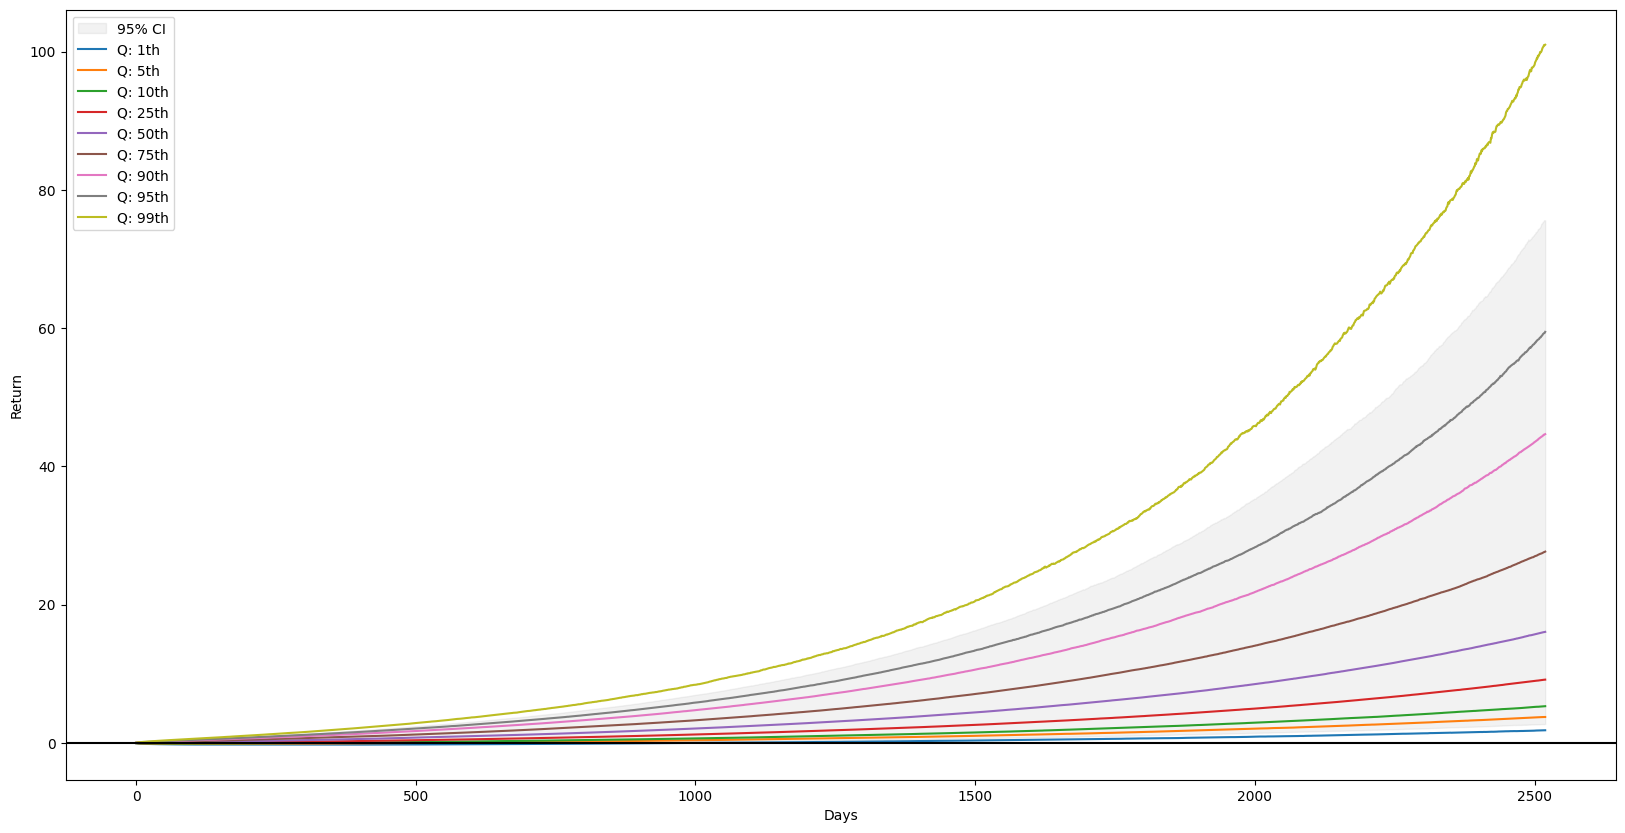

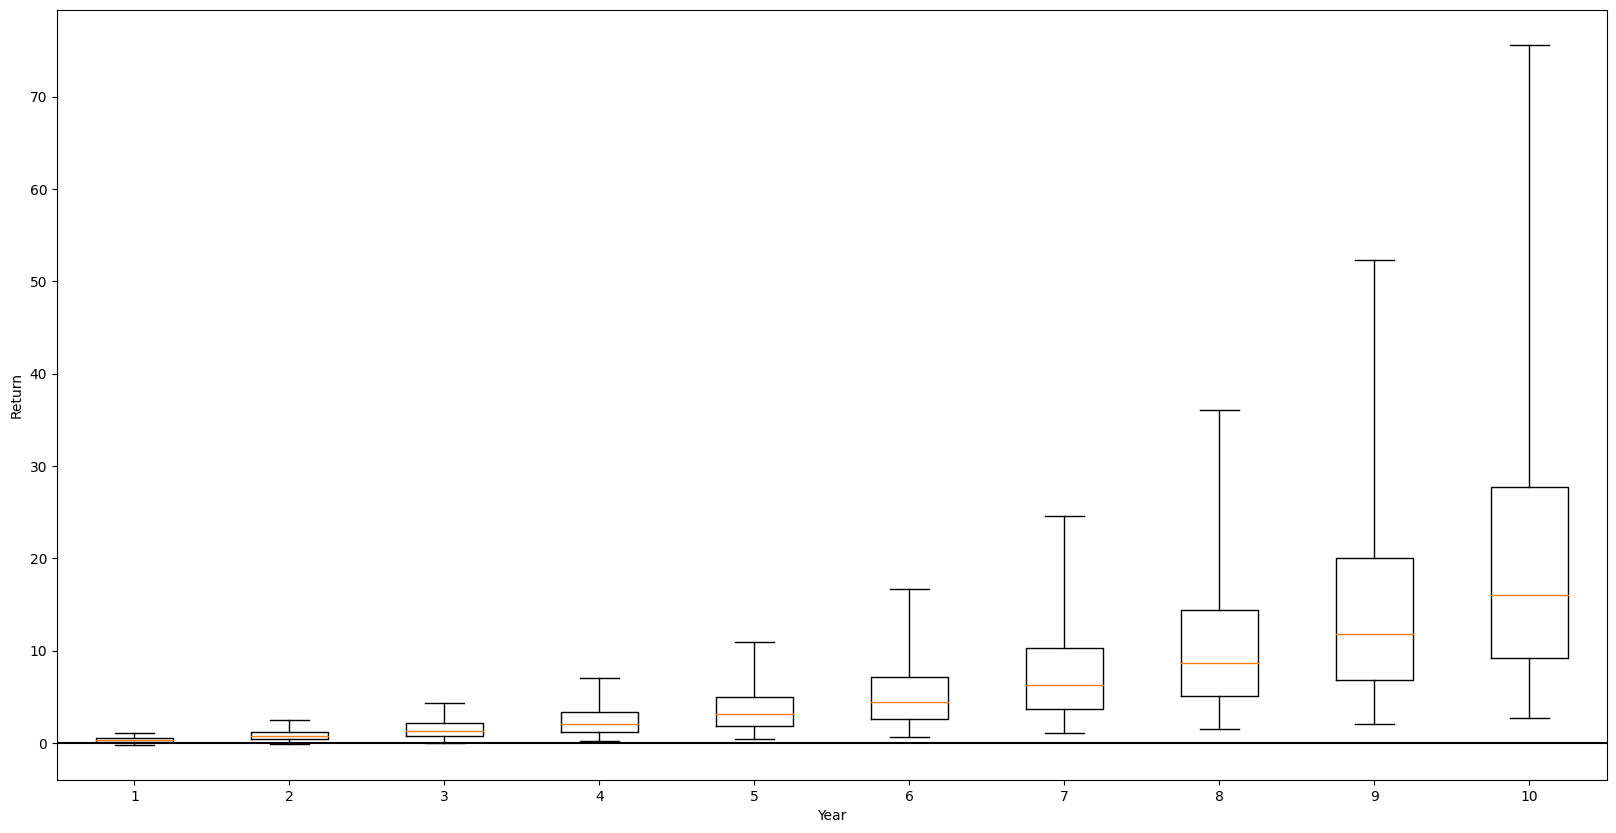

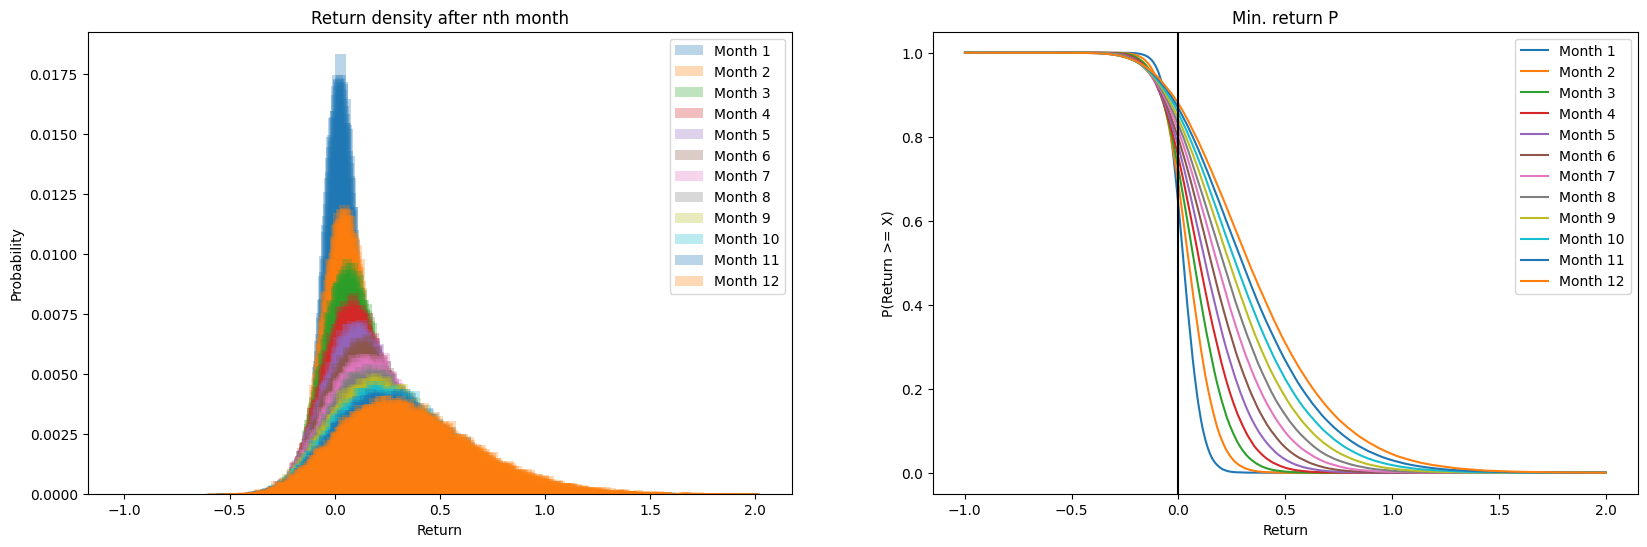

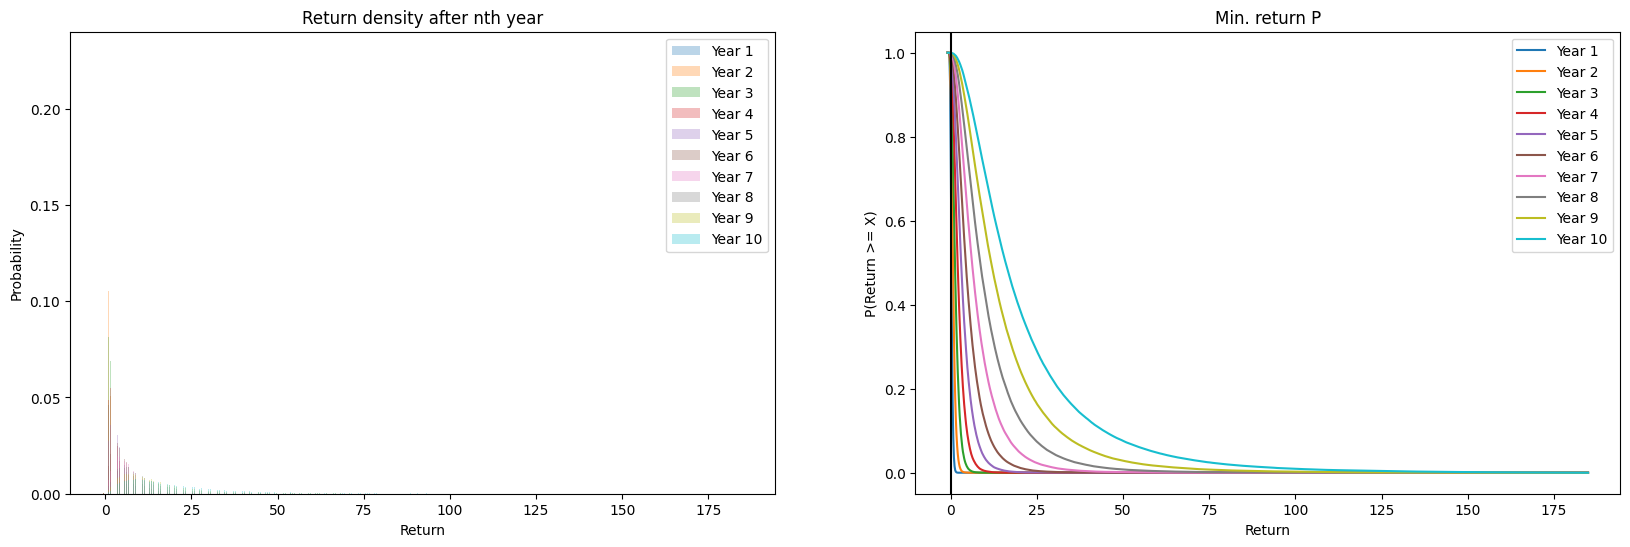

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,11.976,88.024,4.477,0.026,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,5.053,94.947,35.849,6.150,0.803,0.112,0.017,0.004,0.000,0.000,0.000,0.000
3,2.218,97.782,64.736,28.058,10.113,3.498,1.222,0.423,0.146,0.060,0.026,0.015
4,1.012,98.988,81.833,53.033,30.407,16.505,8.873,4.684,2.583,1.398,0.759,0.430
5,0.484,99.516,90.820,72.135,52.468,36.231,24.609,16.628,11.206,7.566,5.129,3.505
6,0.203,99.797,95.412,84.348,70.023,56.168,44.032,34.192,26.304,20.291,15.640,12.171
7,0.098,99.902,97.662,91.538,82.227,71.850,61.817,52.579,44.297,37.178,31.102,26.064
8,0.048,99.952,98.849,95.494,89.912,82.998,75.487,68.033,60.768,54.139,48.062,42.626
9,0.026,99.974,99.419,97.568,94.326,90.068,85.151,79.600,74.080,68.665,63.494,58.435


In [36]:
cum_returns = plot_traces(traces)
returns_table(cum_returns)

### MCMC Projection

In [37]:
mcmc_traces = mcmc_sample_returns(ret, 10 * 252, n_traces=100000, mc_states = 10, n_jobs=10)

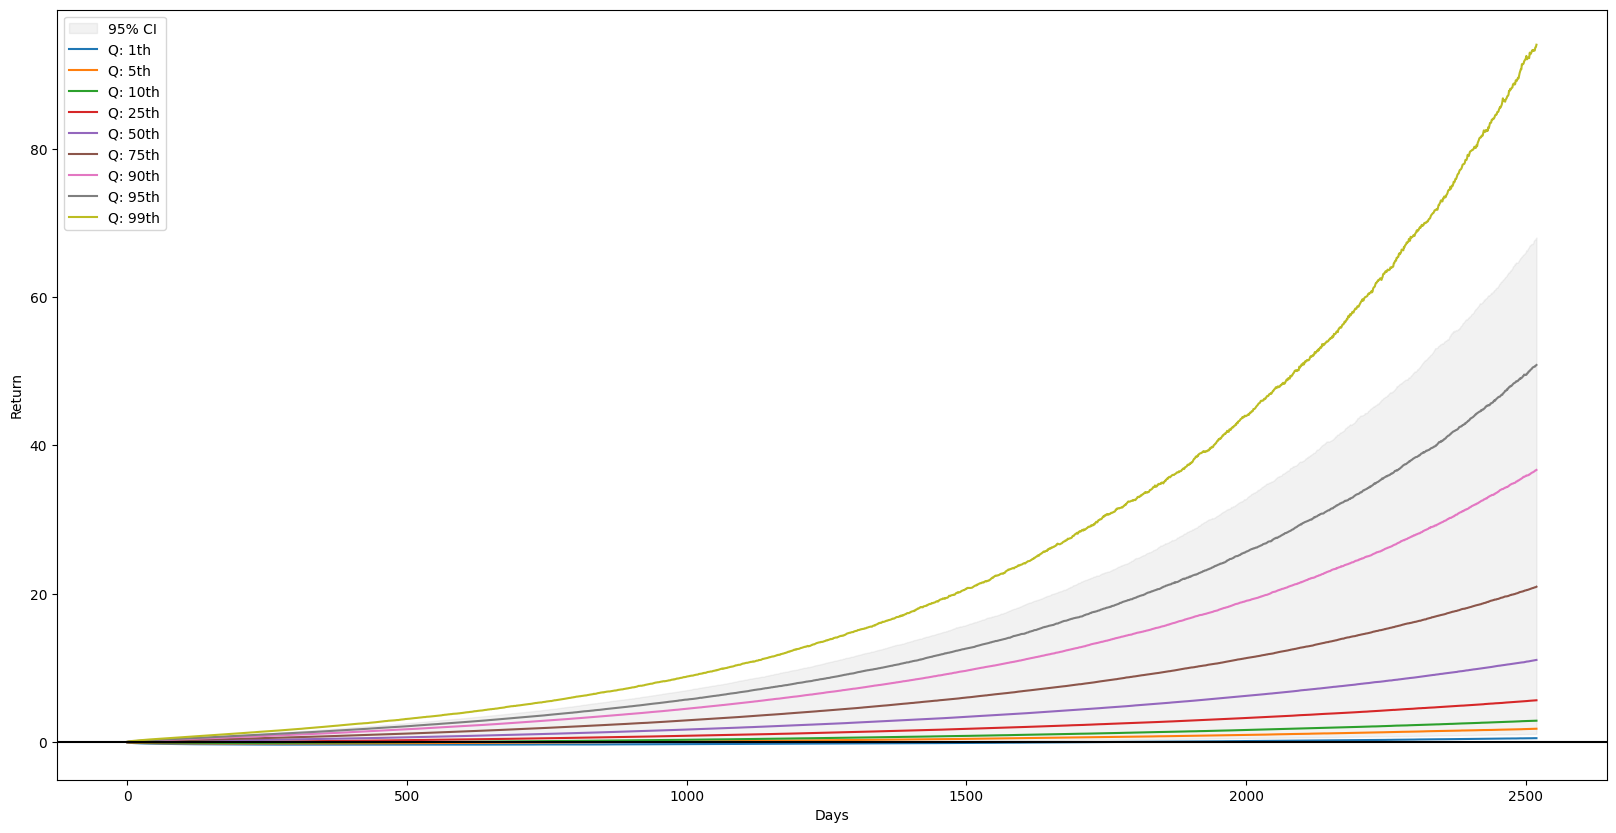

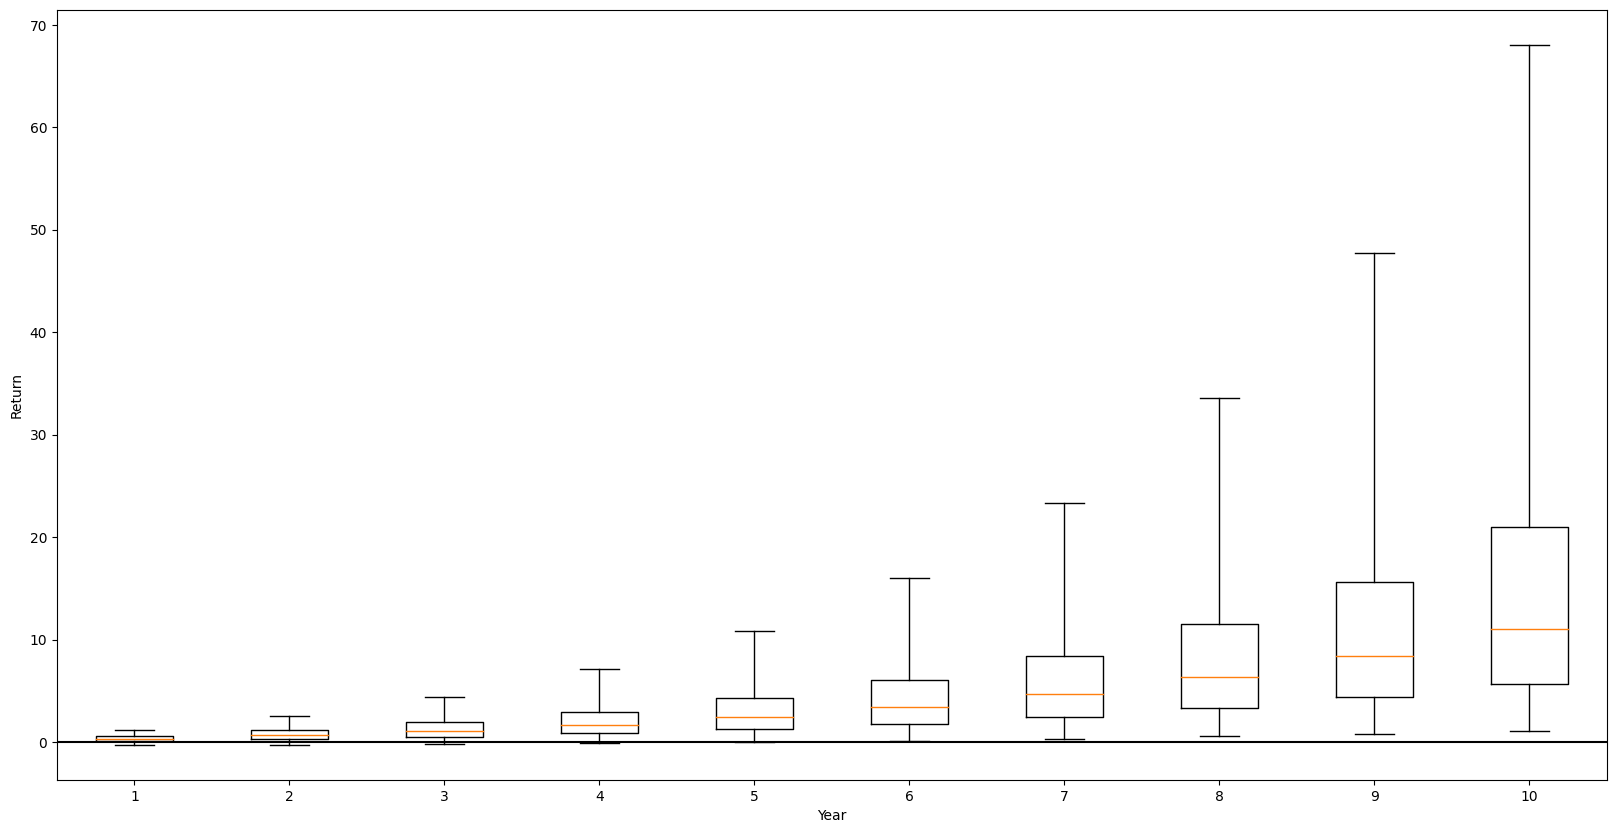

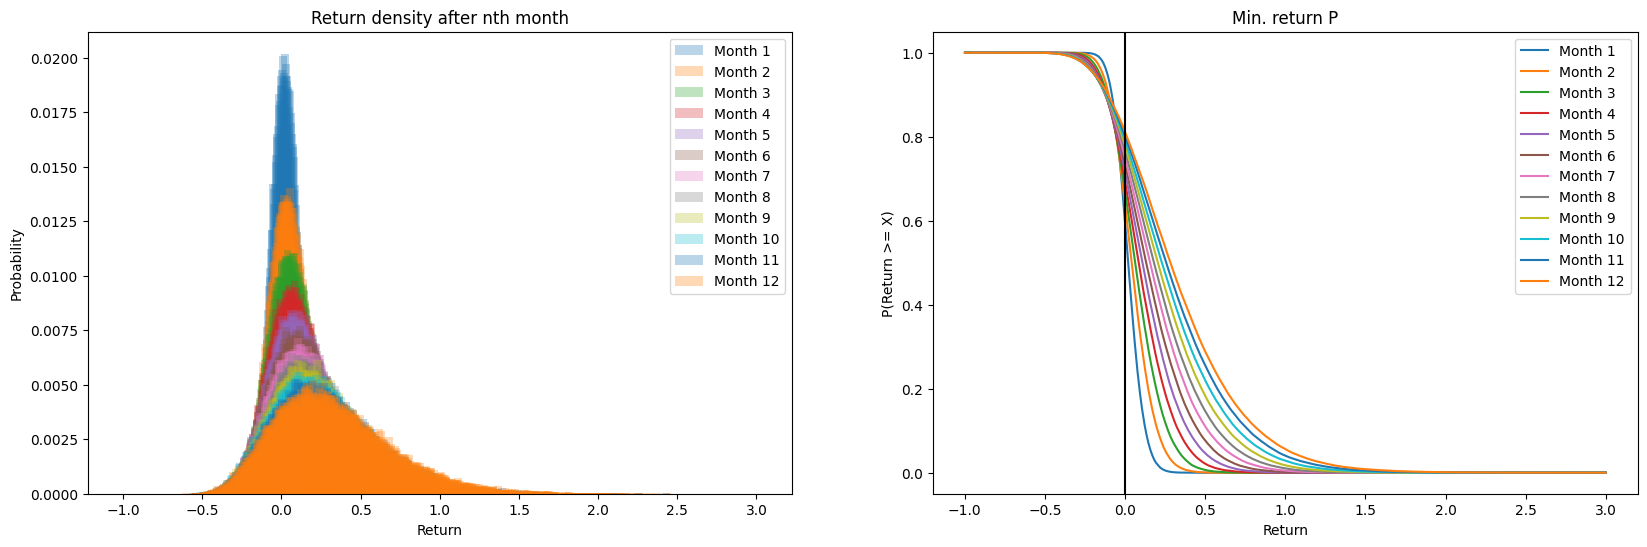

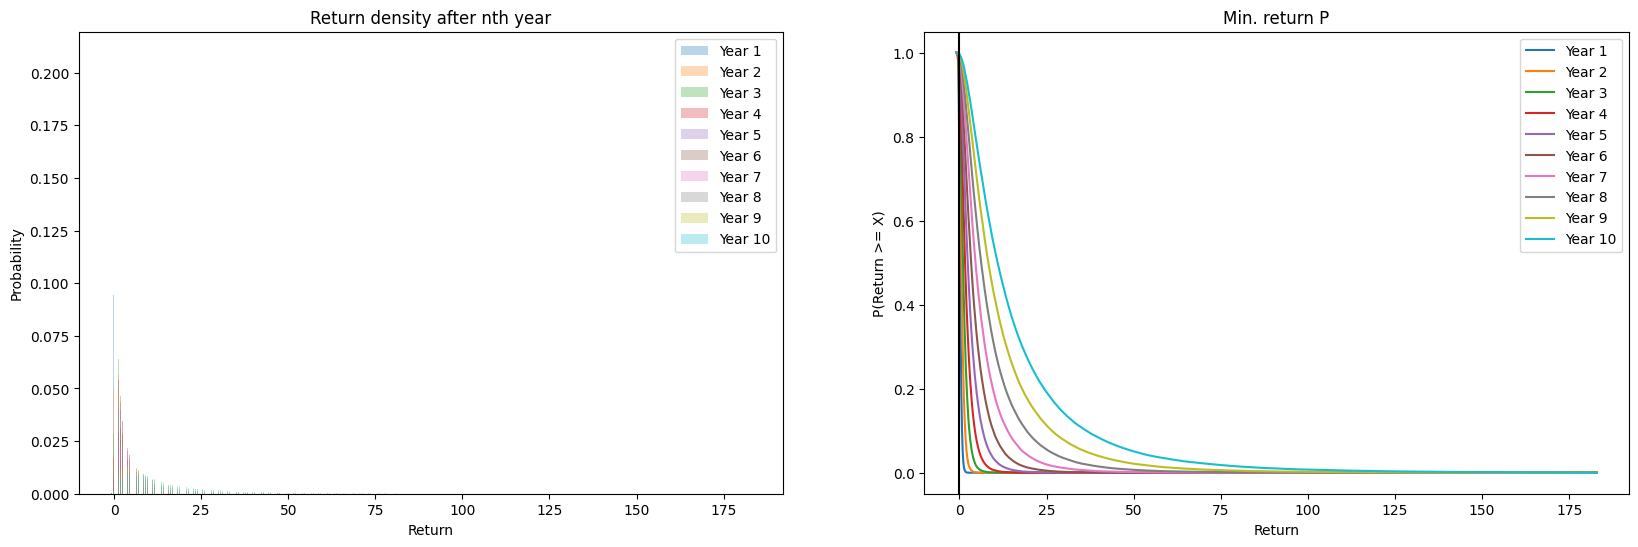

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,18.597,81.403,5.683,0.123,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,10.449,89.551,31.263,6.508,1.237,0.261,0.052,0.013,0.004,0.001,0.000,0.000
3,6.175,93.825,54.623,23.596,9.422,3.725,1.523,0.681,0.346,0.151,0.072,0.032
4,3.860,96.140,70.564,42.815,24.439,13.683,7.732,4.438,2.612,1.591,0.963,0.604
5,2.330,97.670,81.148,59.411,41.059,28.160,19.301,13.290,9.254,6.412,4.567,3.281
6,1.546,98.454,87.871,71.809,56.295,43.199,33.144,25.609,19.922,15.495,12.051,9.553
7,0.987,99.013,92.196,80.897,68.627,57.247,47.331,39.146,32.595,27.049,22.573,18.909
8,0.590,99.410,94.897,87.043,77.894,68.461,60.081,52.331,45.715,39.850,34.803,30.380
9,0.388,99.612,96.676,91.333,84.603,77.484,70.482,63.823,57.642,52.013,47.041,42.572


In [38]:
mcmc_cum_returns = plot_traces(mcmc_traces)
returns_table(mcmc_cum_returns)